# ***ARIMA MODEL***

In [ ]:
#Import Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Loading Dataset
air_ps_dataset = pd.read_csv('/content/AirPassengers.csv')
air_ps_dataset.head(10)

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
5,1949-06,135
6,1949-07,148
7,1949-08,148
8,1949-09,136
9,1949-10,119


***Data Analysis***

In [ ]:
air_ps_dataset.shape

(144, 2)

In [ ]:
air_ps_dataset.isnull().sum()

Month          0
#Passengers    0
dtype: int64

In [ ]:
air_ps_dataset.duplicated().sum()

0

In [ ]:
air_ps_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [ ]:
air_ps_dataset.describe()

,#Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [ ]:
air_ps_dataset['Month'] = pd.to_datetime(air_ps_dataset['Month'])

In [ ]:
air_ps_indexedData = air_ps_dataset.set_index('Month')
air_ps_indexedData.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


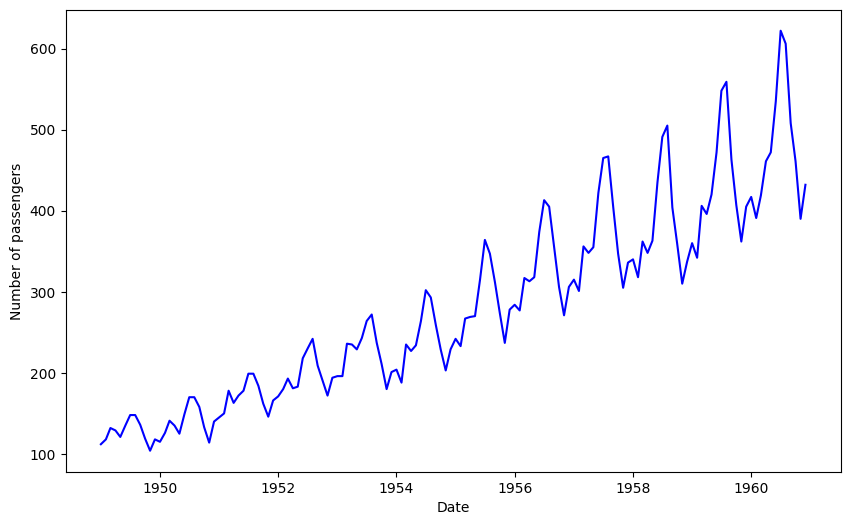

In [ ]:
plt.plot(air_ps_indexedData, color='blue')
plt.xlabel('Date')
plt.ylabel('Number of passengers')
plt.show()

***4 Month Moving Average***

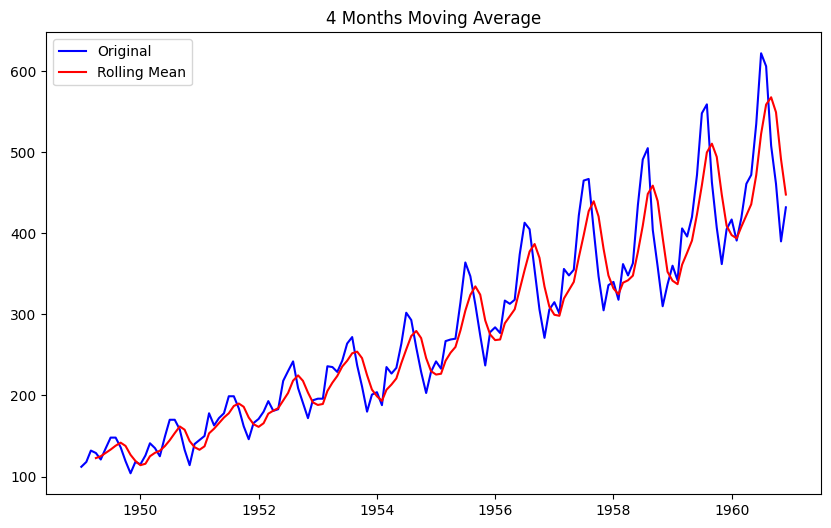

In [ ]:
#Rolling Mean
four_months_moving_average = air_ps_indexedData.rolling(window=4).mean()

plt.plot(air_ps_indexedData, color='blue', label='Original')
plt.plot(four_months_moving_average, color='red', label='Rolling Mean')
plt.legend(loc='best')
plt.title('4 Months Moving Average')
plt.show()

***6-Months Moving Average***

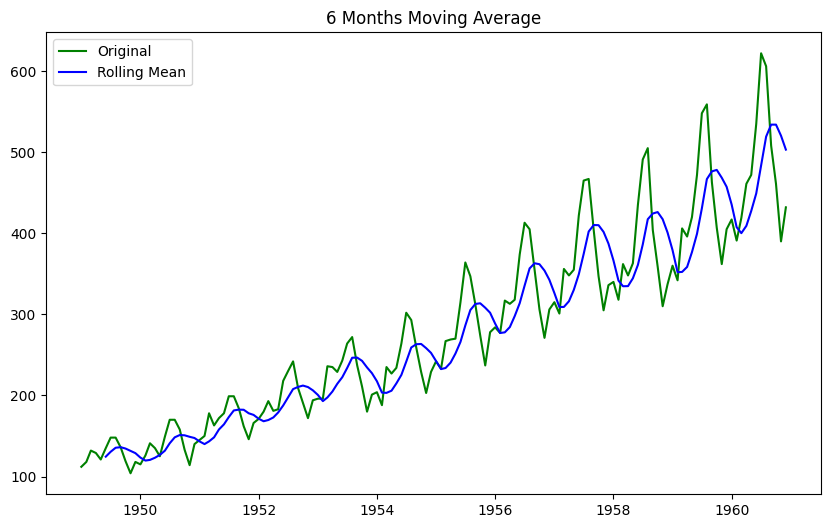

In [ ]:
six_months_moving_average = air_ps_indexedData.rolling(window=6).mean()

plt.plot(air_ps_indexedData, color='green', label='Original')
plt.plot(six_months_moving_average, color='blue', label='Rolling Mean')
plt.legend(loc='best')
plt.title('6 Months Moving Average')
plt.show()

***8-Month Moving Average***

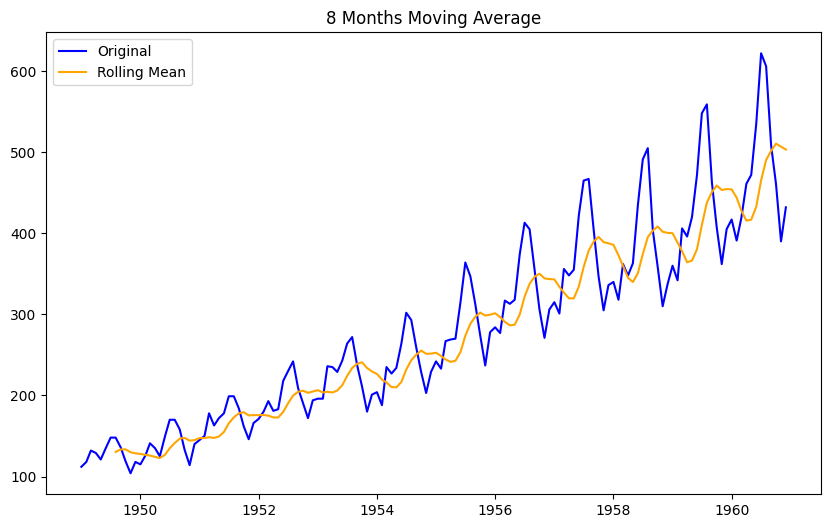

In [ ]:
eight_months_moving_average = air_ps_indexedData.rolling(window=8).mean()

plt.plot(air_ps_indexedData, color='blue', label='Original')
plt.plot(eight_months_moving_average, color='orange', label='Rolling Mean')
plt.legend(loc='best')
plt.title('8 Months Moving Average')
plt.show()

***12-Month Moving Average***

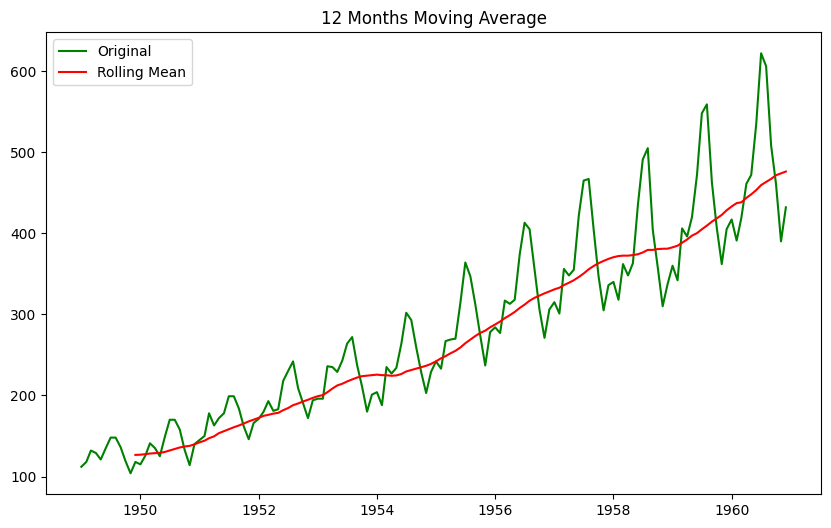

In [ ]:
twelve_months_moving_average = air_ps_indexedData.rolling(window=12).mean()

plt.plot(air_ps_indexedData, color='green', label='Original')
plt.plot(twelve_months_moving_average, color='red', label='Rolling Mean')
plt.legend(loc='best')
plt.title('12 Months Moving Average')
plt.show()

***Rolling statistics***

In [ ]:
# Rolling Mean and Std Dev
rollmean = air_ps_indexedData.rolling(window=12).mean()
print("\nRolling Mean :\n",rollmean)

rollstd = air_ps_indexedData.rolling(window=12).std()
print("\nRolling Standard Deviation :\n",rollstd)


Rolling Mean :
             #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01   463.333333
1960-09-01   467.083333
1960-10-01   471.583333
1960-11-01   473.916667
1960-12-01   476.166667

[144 rows x 1 columns]

Rolling Standard Deviation :
             #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01    83.630500
1960-09-01    84.617276
1960-10-01    82.541954
1960-11-01    79.502382
1960-12-01    77.737125

[144 rows x 1 columns]


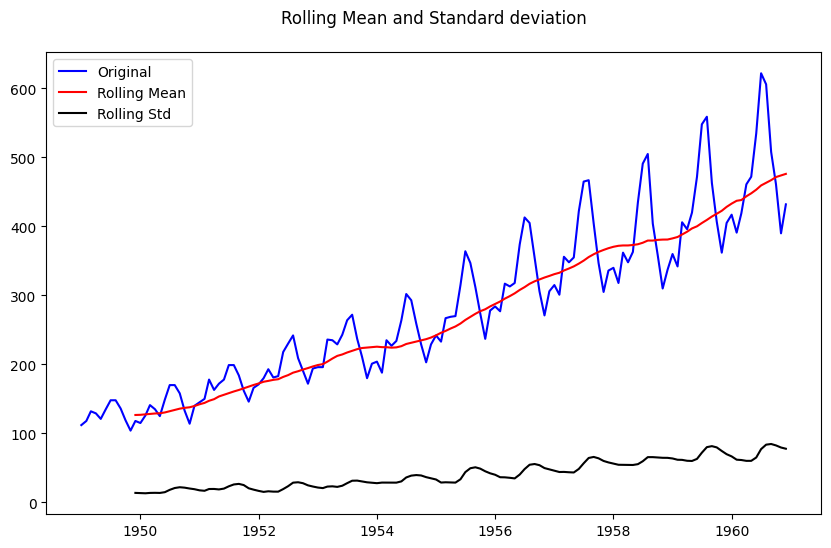

In [ ]:
plt.plot(air_ps_indexedData, color='blue', label='Original')
plt.plot(rollmean, color='red', label='Rolling Mean')
plt.plot(rollstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean and Standard deviation\n')
plt.show()

***Dickey Fuller test***

In [ ]:
print("Result of Dicky-Fuller Test:\n")
dftest = adfuller(air_ps_indexedData['#Passengers'], autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', 'No. of Lags used', 'Number of observations used'])
for key,value in dftest[4].items():
  dfoutput['Critical Value (%s)' %key] = value

dfoutput

Result of Dicky-Fuller Test:



Test Statistic                   0.815369
p-value                          0.991880
No. of Lags used                13.000000
Number of observations used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64

***Estimating trend***

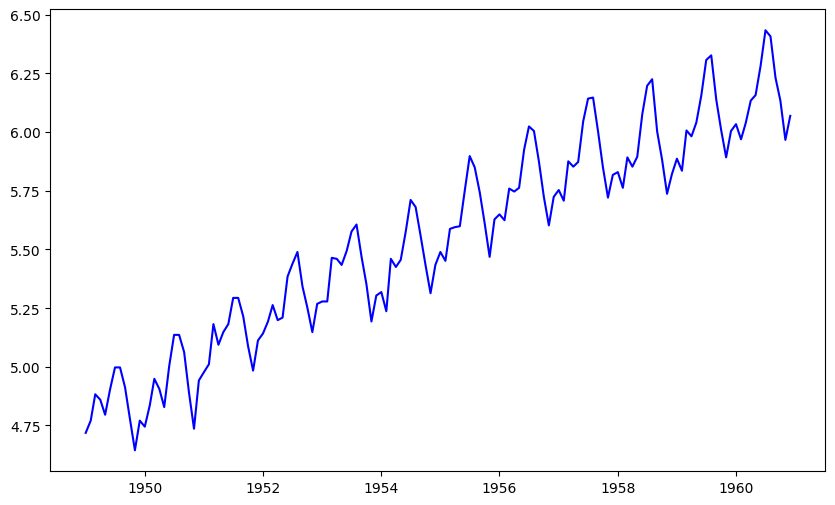

In [ ]:
indexedData_logScale= np.log(air_ps_indexedData)

plt.plot(indexedData_logScale, 'blue')
plt.show()

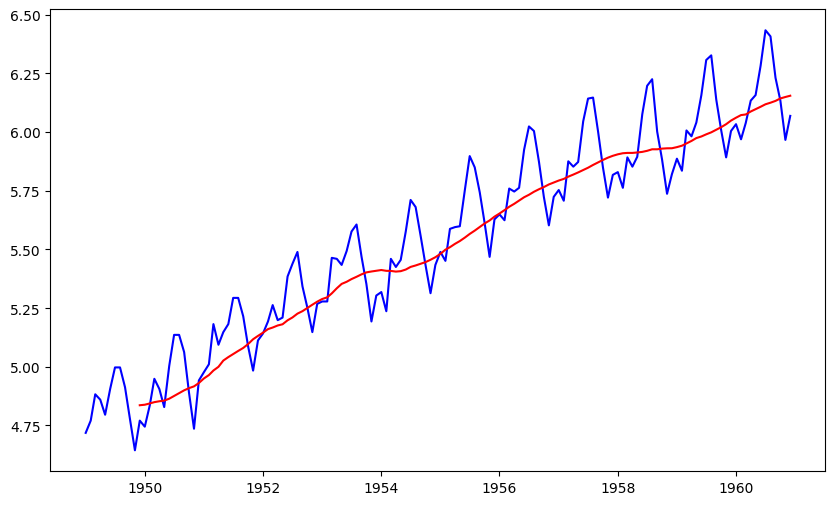

In [ ]:
movingAverage = indexedData_logScale.rolling(window=12).mean()
movingSTD = indexedData_logScale.rolling(window=12).std()
plt.plot(indexedData_logScale, color='blue')
plt.plot(movingAverage, color='red')

In [ ]:
dataLogScaleMinusMovingAverage = indexedData_logScale - movingAverage
dataLogScaleMinusMovingAverage.dropna(inplace=True)
dataLogScaleMinusMovingAverage.head()

,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142


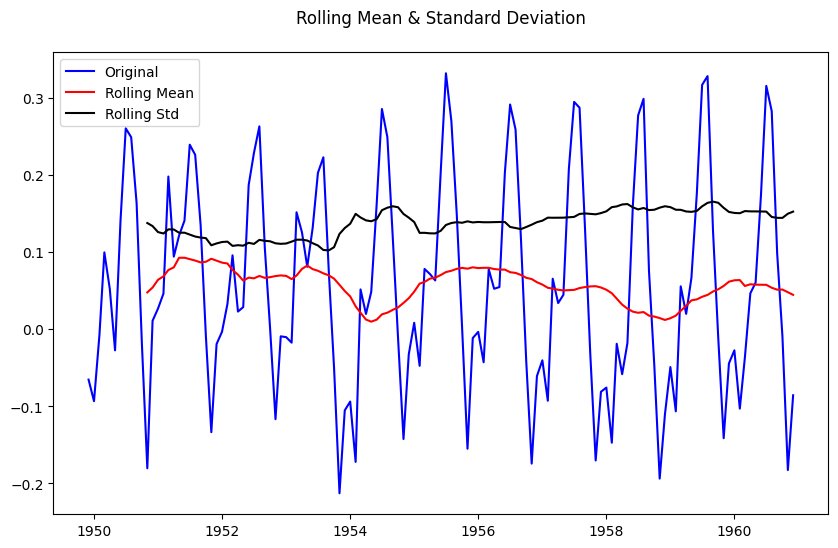



Results of Dickey Fuller Test:

Test Statistic                  -3.162908
p-value                          0.022235
No. of Lags used                13.000000
Number of observations used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


In [ ]:
def test_stationarity(timeseries):

    # Rolling statistics
    movingAverage = timeseries.rolling(window=12).mean()
    movingSTD = timeseries.rolling(window=12).std()

    # Plot rolling statistics
    plt.plot(timeseries, color='blue', label='Original')
    plt.plot(movingAverage, color='red', label='Rolling Mean')
    plt.plot(movingSTD, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation\n')
    plt.show(block=False)

    # Dickey Fuller test
    print('\n\nResults of Dickey Fuller Test:\n')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', 'No. of Lags used', 'Number of observations used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)' %key] = value
    print(dfoutput)

test_stationarity(dataLogScaleMinusMovingAverage)

***Another transformation***

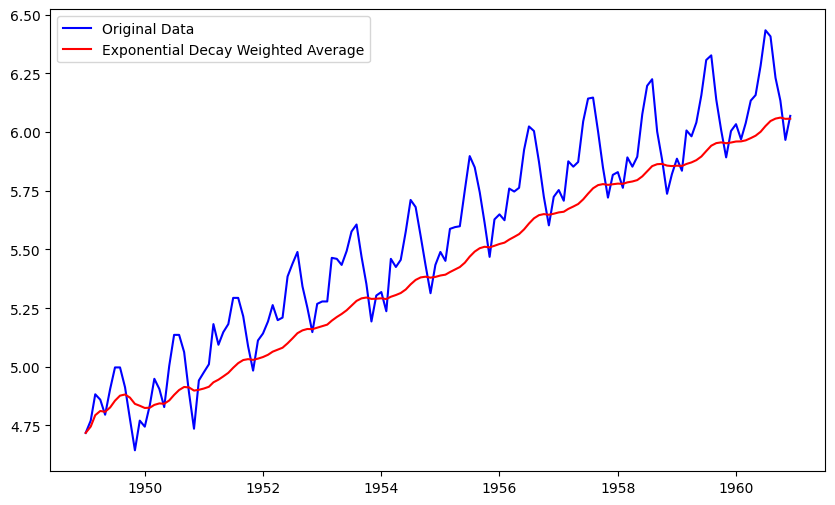

In [ ]:
exponentialDecayWeightedAverage = indexedData_logScale.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.plot(indexedData_logScale, color='blue', label='Original Data')
plt.plot(exponentialDecayWeightedAverage, color='red', label='Exponential Decay Weighted Average')
plt.legend()
plt.show()

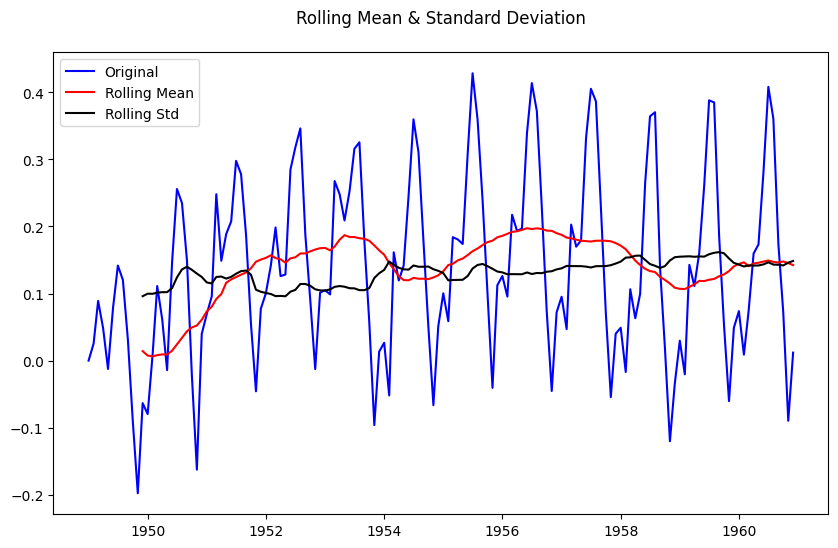



Results of Dickey Fuller Test:

Test Statistic                  -3.601262
p-value                          0.005737
No. of Lags used                13.000000
Number of observations used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [ ]:
dataLogScaleMinusMovingExponentialDecayAverage = indexedData_logScale - exponentialDecayWeightedAverage
test_stationarity(dataLogScaleMinusMovingExponentialDecayAverage)

***Another way of making the time series stationary is by differencing.***

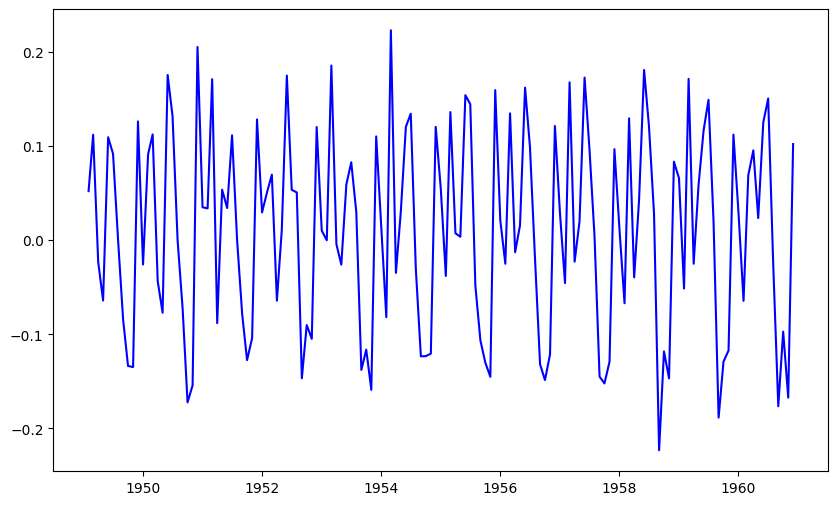

In [ ]:
dataLogDiffShifting = indexedData_logScale - indexedData_logScale.shift()
plt.plot(dataLogDiffShifting, color='blue')

In [ ]:
dataLogDiffShifting.dropna(inplace=True)

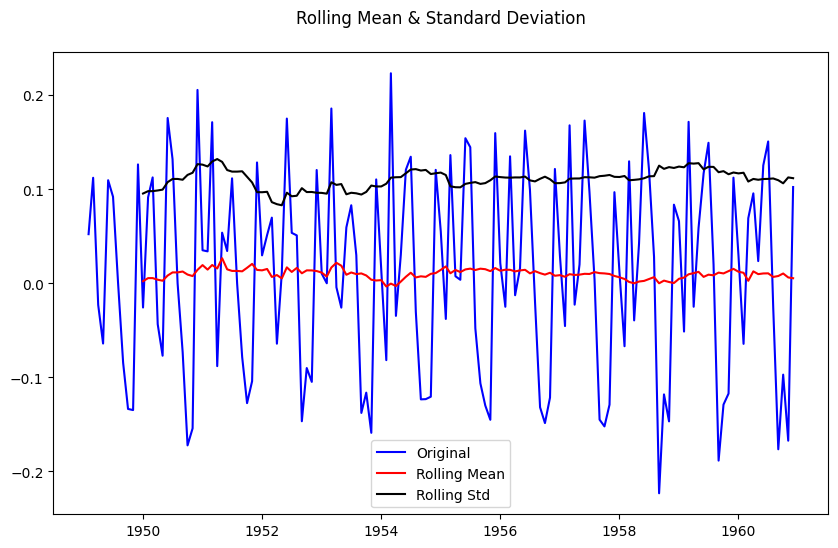



Results of Dickey Fuller Test:

Test Statistic                  -2.717131
p-value                          0.071121
No. of Lags used                14.000000
Number of observations used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


In [ ]:
test_stationarity(dataLogDiffShifting)

***Components of time series :- Seasonal decompose***

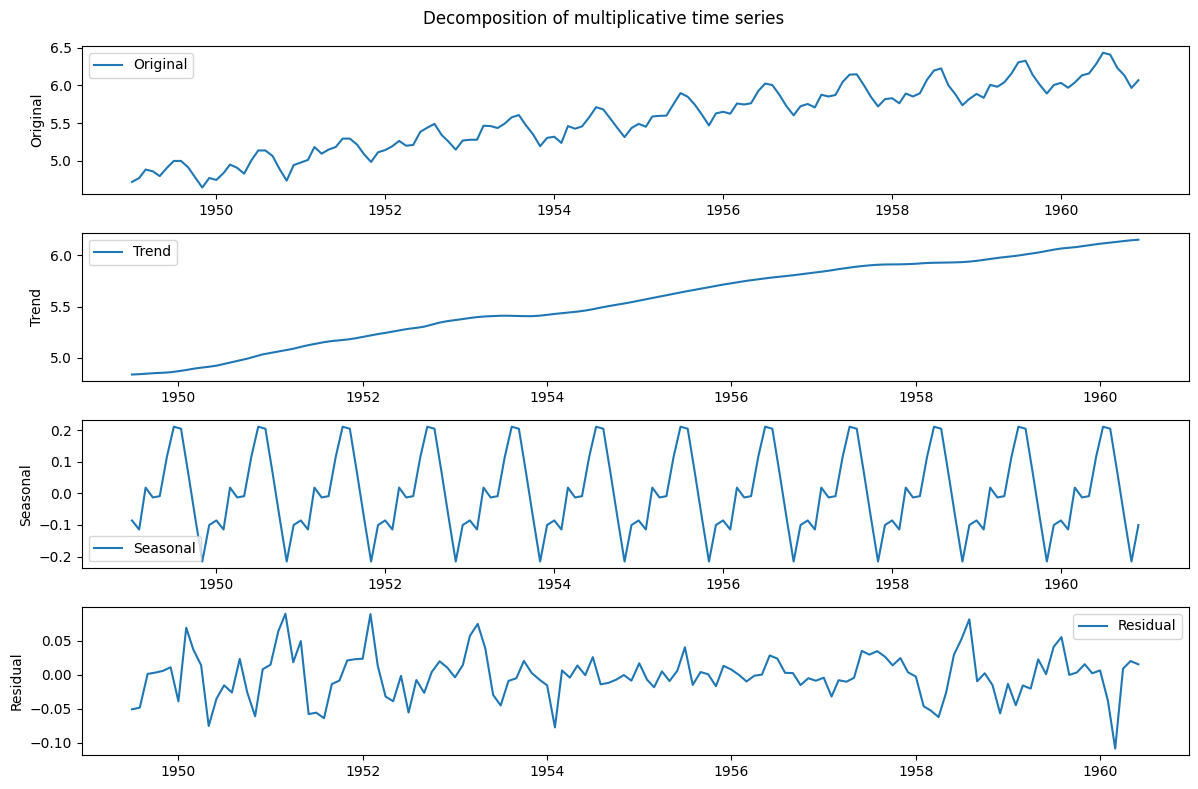

In [ ]:
decomposition = seasonal_decompose(indexedData_logScale)

# Extract components
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot decomposition
fig, axes = plt.subplots(4, 1, figsize=(12, 8))

# Plot original time series
axes[0].plot(indexedData_logScale, label='Original')
axes[0].set_ylabel('Original')

# Plot trend
axes[1].plot(trend, label='Trend')
axes[1].set_ylabel('Trend')

# Plot seasonal component
axes[2].plot(seasonal, label='Seasonal')
axes[2].set_ylabel('Seasonal')

# Plot residual
axes[3].plot(residual, label='Residual')
axes[3].set_ylabel('Residual')

# Add titles and legend
plt.suptitle('Decomposition of multiplicative time series')
for ax in axes:
    ax.legend()
plt.tight_layout()
plt.show()

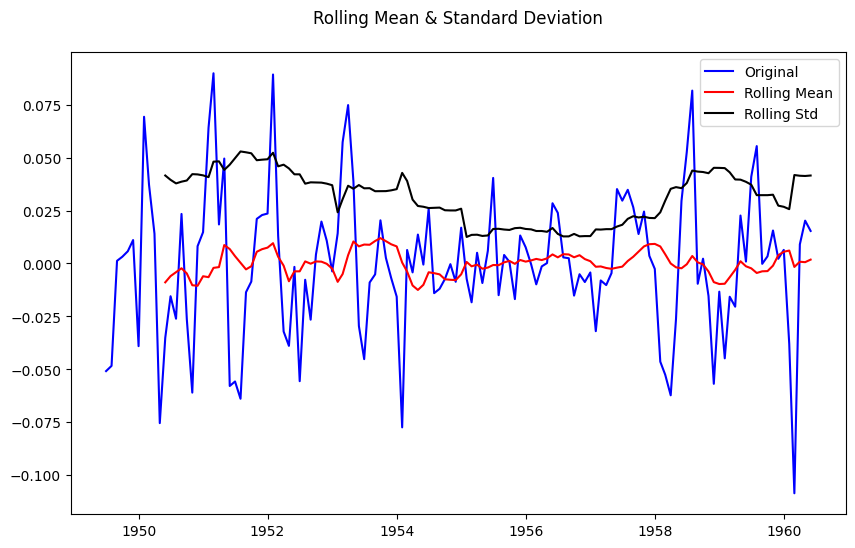



Results of Dickey Fuller Test:

Test Statistic                -6.332387e+00
p-value                        2.885059e-08
No. of Lags used               9.000000e+00
Number of observations used    1.220000e+02
Critical Value (1%)           -3.485122e+00
Critical Value (5%)           -2.885538e+00
Critical Value (10%)          -2.579569e+00
dtype: float64


In [ ]:
decomposedLogData = residual
decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData )

***ACF and PACF plots***

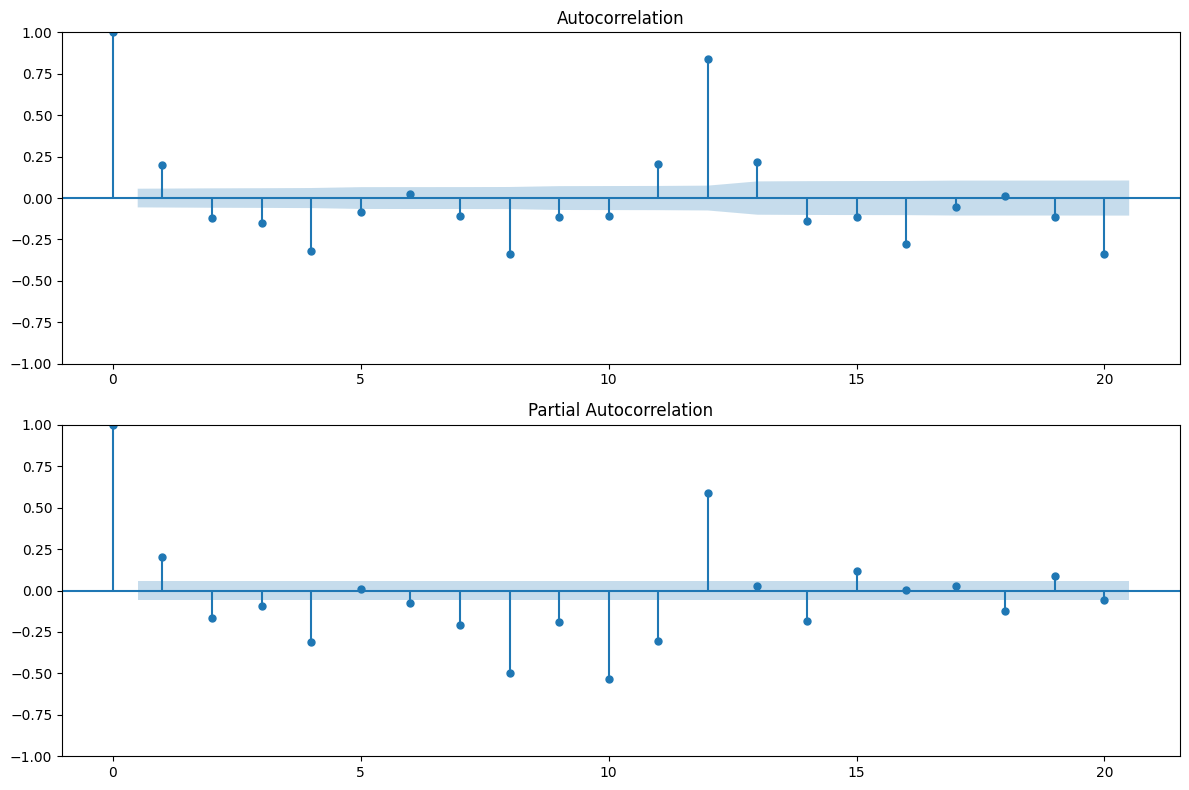

In [ ]:
fig, axes = plt.subplots(2, 1, sharey=False, sharex=False, figsize=(12, 8))

plot_acf(dataLogDiffShifting, lags=20, ax=axes[0], alpha=0.5)
plot_pacf(dataLogDiffShifting, lags=20, ax=axes[1], alpha=0.5)

plt.tight_layout()
plt.show()

***ARIMA Model***

In [ ]:
# ARIMA model
model = ARIMA(indexedData_logScale, order=(2, 1, 2))
arima_model = model.fit()

In [ ]:
arima_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            #Passengers   No. Observations:                  144
Model:                 ARIMA(2, 1, 2)   Log Likelihood                 128.890
Date:                Sun, 24 Mar 2024   AIC                           -247.780
Time:                        11:37:50   BIC                           -232.965
Sample:                    01-01-1949   HQIC                          -241.760
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2432      0.166      1.469      0.142      -0.081       0.568
ar.L2          0.2677      0.199      1.344      0.179      -0.123       0.658
ma.L1         -0.0867      0.118     -0.732      0.464      -0.319       0.145
ma.L2         -0.6813      0.142     -4.785      0.000      -0.960      -0.402
sigma2         0.0096      0.002      5.730      0.000       0.006       0.013
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 7.04
Prob(Q):                              0.94   Prob(JB):                         0.03
Heteroskedasticity (H):               1.08   Skew:                            -0.06
Prob(H) (two-sided):                  0.79   Kurtosis:                         1.92
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

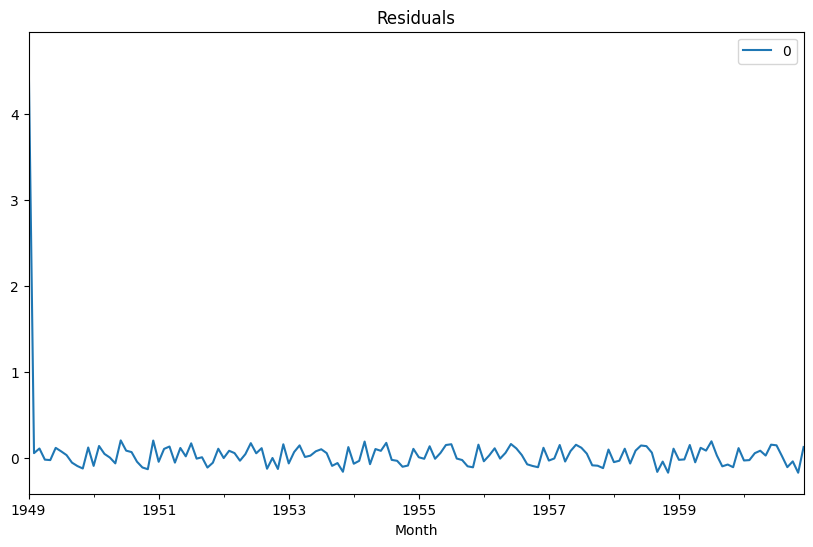

In [ ]:
# Plot residual errors
residuals = pd.DataFrame(arima_model.resid)
residuals.plot()
plt.title('Residuals')
plt.show()

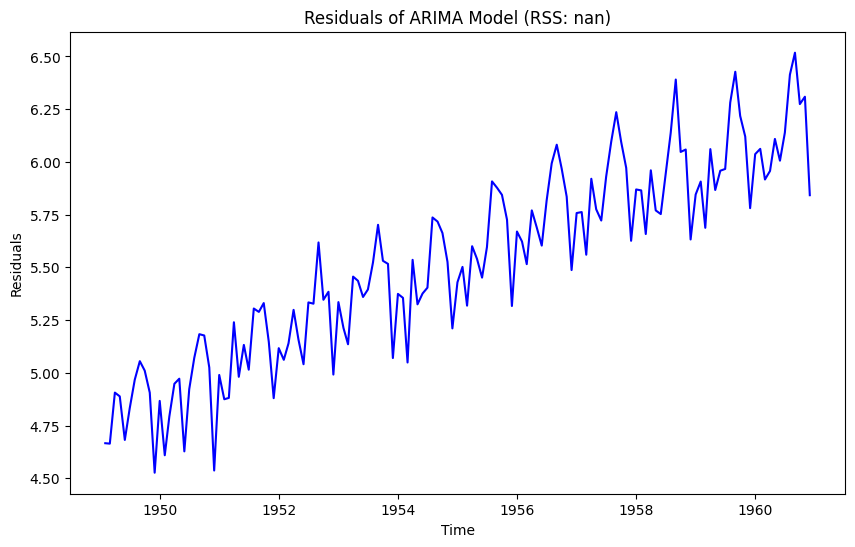

In [ ]:
# Calculate residuals
residuals = arima_model.fittedvalues - dataLogDiffShifting['#Passengers']

# Calculate RSS
rss = sum(residuals**2)

# Plot RSS
plt.plot(residuals, color='blue')
plt.title('Residuals of ARIMA Model (RSS: %.4f)' % rss)
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.show()


In [ ]:
predictions_ARIMA_diff = pd.Series(arima_model.fittedvalues, copy=True)

if predictions_ARIMA_diff.iloc[0] == 0:
    # If the first value is zero, replace it with the first value of the original data
    original_first_value = dataLogDiffShifting.iloc[0]  # You need to replace 'original_data' with your actual original data
    predictions_ARIMA_diff.iloc[0] = original_first_value

predictions_ARIMA_diff.head()

Month
1949-01-01    0.052186
1949-02-01    4.718499
1949-03-01    4.776385
1949-04-01    4.883216
1949-05-01    4.824421
dtype: float64

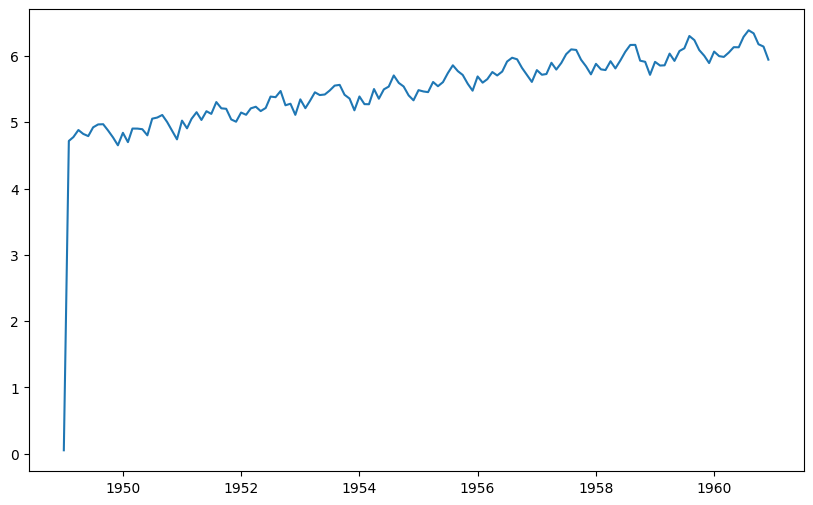

In [ ]:
plt.plot(predictions_ARIMA_diff)
plt.show()

In [ ]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_diff_cumsum.head()

Month
1949-01-01     0.052186
1949-02-01     4.770685
1949-03-01     9.547070
1949-04-01    14.430286
1949-05-01    19.254707
dtype: float64

In [ ]:
predictions_ARIMA_log = pd.Series(indexedData_logScale['#Passengers'].iloc[0], index=indexedData_logScale.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA_log.head()

Month
1949-01-01     4.770685
1949-02-01     9.489184
1949-03-01    14.265569
1949-04-01    19.148785
1949-05-01    23.973206
dtype: float64

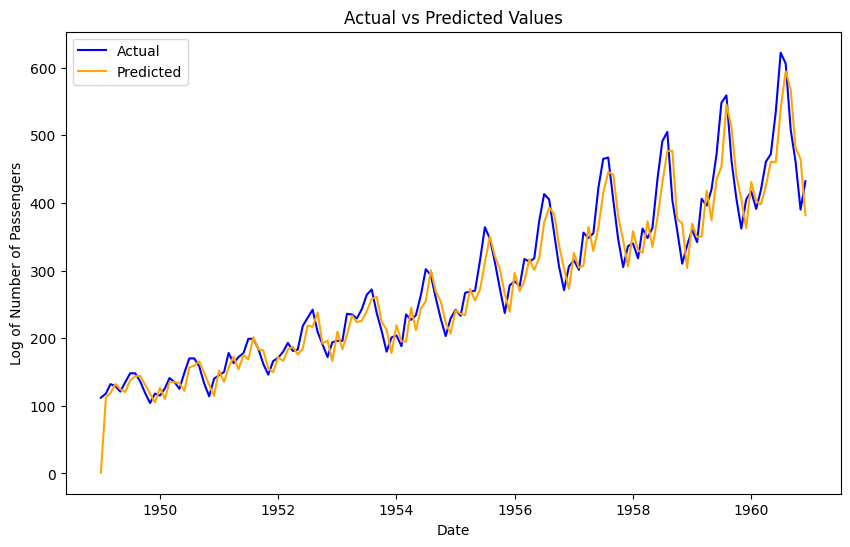

In [ ]:
# Predicting using the ARIMA model
predicted_values = arima_model.predict(typ='levels')
predictions_ARIMA_log = pd.Series(predicted_values, copy=True)
predictions_ARIMA = np.exp(predictions_ARIMA_log)

# Plot actual vs predicted values
plt.plot(air_ps_indexedData, color='blue', label='Actual')
plt.plot(predictions_ARIMA, color='orange', label='Predicted')
plt.legend()
plt.title('Actual vs Predicted Values')
plt.xlabel('Date')
plt.ylabel('Log of Number of Passengers')
plt.show()